In [1]:
from physics.hstar import gghzz, c6
from physics.hzz import angles, zpair
from physics.simulation import msq

import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
sample_sbi = gghzz.Process(msq.Component.SBI, (1.5569109, '/raven/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ2e2m_sbi/events.csv', 1e5))
sample_sig = gghzz.Process(msq.Component.SIG, (0.15105108, '/raven/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ2e2m_sig/events.csv', 1e5))

In [3]:
events_sig = sample_sig[msq.Component.SIG]
events_sig_from_sbi = sample_sbi[msq.Component.SIG]

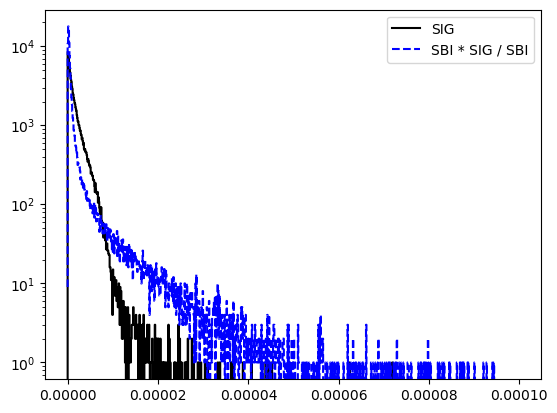

In [4]:
w_bins = np.linspace(-1e-7,1e-4,1001)
h_w_sig, _ = np.histogram(events_sig.weights, bins=w_bins)
h_w_sig_from_sbi, _ = np.histogram(events_sig_from_sbi.weights, bins=w_bins)

plt.step(w_bins[:-1], h_w_sig, color='black', label='SIG')
plt.step(w_bins[:-1], h_w_sig_from_sbi, color='blue', linestyle='--', label='SBI * SIG / SBI')
plt.legend()
plt.yscale('log')

In [5]:
# effective sample size
print('Neff(SIG) = ', np.square(np.sum(events_sig.weights))/np.sum(np.square(events_sig.weights)))
print('Neff(SBI * SIG / SBI) =', np.square(np.sum(events_sig_from_sbi.weights))/np.sum(np.square(events_sig_from_sbi.weights)))

Neff(SIG) =  39031.903163415955
Neff(SBI * SIG / SBI) = 7798.8449801505585


In [6]:
def compute_m4l(kinematics):
  ileptons = range(3,7)
  p4l_px = np.sum([kinematics[f'p{i}_px'] for i in ileptons], axis=0)
  p4l_py = np.sum([kinematics[f'p{i}_py'] for i in ileptons], axis=0)
  p4l_pz = np.sum([kinematics[f'p{i}_pz'] for i in ileptons], axis=0)
  p4l_E = np.sum([kinematics[f'p{i}_E'] for i in ileptons], axis=0)
  return np.sqrt(p4l_E**2 - p4l_px**2 - p4l_py**2 - p4l_pz**2)

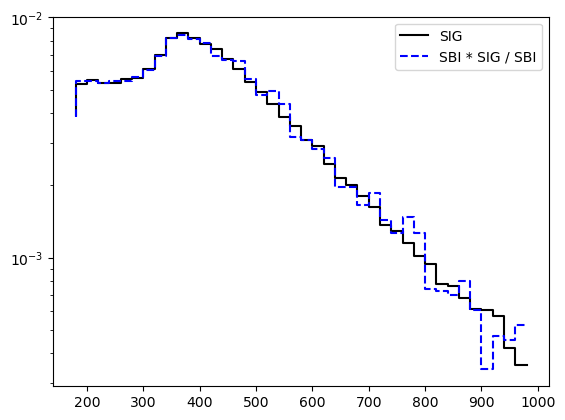

In [7]:
m4l_bins = np.arange(180.0,1020.0,20.0)
h_m4l_sig, _ = np.histogram(compute_m4l(events_sig.kinematics), weights=events_sig.weights, bins=m4l_bins)
h_m4l_sig_from_sbi, _ = np.histogram(compute_m4l(events_sig_from_sbi.kinematics), weights=events_sig_from_sbi.weights, bins=m4l_bins)

plt.step(m4l_bins[:-1], h_m4l_sig, color='black', label='SIG')
plt.step(m4l_bins[:-1], h_m4l_sig_from_sbi, color='blue', linestyle='--', label='SBI * SIG / SBI')
plt.legend()
plt.yscale('log')

# $c_6$-varied weights vs. SM

In [33]:
c6mod_sig = c6.Modifier(msq.Component.SIG)
w_sm, p_sm = events_sig.weights, events_sig.probabilities
w_c6, p_c6 = c6mod_sig.modify(sample_sig, c6=[-10,10])

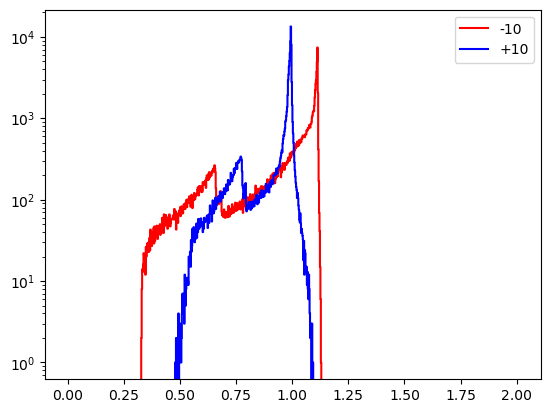

In [31]:
wratio_bins = np.linspace(0.0,2.01,1001)

h_wratio_neg10, _ = np.histogram(w_c6[:,0] / w_sm, bins=wratio_bins)
h_wratio_pos10, _ = np.histogram(w_c6[:,1] / w_sm, bins=wratio_bins)

plt.step(wratio_bins[:-1], h_wratio_neg10, color='red', label='-10')
plt.step(wratio_bins[:-1], h_wratio_pos10, color='blue',label='+10')

plt.legend()
plt.yscale('log')

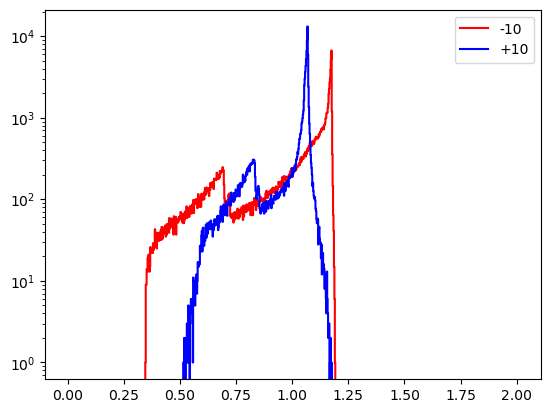

In [34]:
pratio_bins = np.linspace(0.0,2.01,1001)

h_pratio_neg10, _ = np.histogram(p_c6[:,0] / p_sm, bins=pratio_bins)
h_pratio_pos10, _ = np.histogram(p_c6[:,1] / p_sm, bins=pratio_bins)

plt.step(pratio_bins[:-1], h_pratio_neg10, color='red', label='-10')
plt.step(pratio_bins[:-1], h_pratio_pos10, color='blue',label='+10')

plt.legend()
plt.yscale('log')